# Tratamento de Dados de Sat√©lite
**Equipe:** Daniel, Jones, Kleberson, Murilo

## Apresenta√ß√£o
### O Telesc√≥pio Kepler e a Descoberta de Exoplanetas

#### Introdu√ß√£o
- O Telesc√≥pio Espacial Kepler, lan√ßado pela NASA em 2009, foi projetado para descobrir exoplanetas, <br>
  ou seja, planetas que orbitam estrelas fora do nosso sistema solar.
- A miss√£o Kepler teve como objetivo principal explorar a estrutura e a diversidade dos sistemas <br>
planet√°rios, contribuindo significativamente para a nossa compreens√£o do universo.

#### Objetivos da Miss√£o Kepler
- **Explora√ß√£o da Diversidade Planet√°ria**: Investigar a variedade de planetas e suas caracter√≠sticas.
- **Identifica√ß√£o de Exoplanetas**: Detectar planetas em zonas habit√°veis, onde a vida poderia existir.
- **Coleta de Dados**: Fornecer dados extensivos que apoiem futuras miss√µes da NASA e pesquisas cient√≠ficas.

#### O Conjunto de Dados
- O conjunto de dados cont√©m informa√ß√µes sobre aproximadamente **3.373 exoplanetas confirmados**.
- Inclui dados coletados durante as miss√µes Kepler e K2, abrangendo v√°rios anos de observa√ß√£o.
- **Informa√ß√µes Dispon√≠veis**:
  - Nome da estrela hospedeira
  - Caracter√≠sticas dos planetas (tamanho, massa, composi√ß√£o)
  - Par√¢metros orbitais (per√≠odo orbital, dist√¢ncia da estrela)
  - M√©todos de descoberta (transito, velocidade radial)
  - Propriedades estelares (tipo de estrela, temperatura)

#### Import√¢ncia dos Dados
- Os dados do Kepler s√£o cruciais para entender a forma√ß√£o e evolu√ß√£o dos sistemas planet√°rios.
- Permitem a an√°lise estat√≠stica da distribui√ß√£o de exoplanetas em diferentes tipos de estrelas e suas caracter√≠sticas.
- A pesquisa com esses dados pode revelar padr√µes que ajudam a identificar quais sistemas planet√°rios t√™m maior probabilidade de abrigar vida.



## An√°lise dos Dados

**Bibliotecas necess√°rias**

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

**Resultados obtidos**

In [4]:
# 1) L√™ o CSV para um DataFrame
df_original = pd.read_csv('data/planets.csv')

# Suponha que a coluna que voc√™ quer checar se chama 'col_importante'

# 2) M√°scara para filtrar os dados mantendo s√≥ as linhas onde 'col_importante' N√ÉO √© NaN
mask = (
    (df_original['pl_hostname'] != '') &
    (df_original['pl_dens'].notna()) &
    (df_original['pl_orbeccen'].notna()) &
    (df_original['pl_bmassj'] != '') &
    (df_original['pl_radj'].notna()) &
    (df_original['pl_orbper'].notna()) &
    (df_original['st_teff'].notna())
)

"""
Alternativa usando dropna para as colunas num√©ricas e filtragem espec√≠fica para as strings:

python

Copiar c√≥digo
# 1) remove linhas com NaN nas colunas num√©ricas
df2 = df.dropna(subset=['pl_dens','pl_radj','pl_orbper','st_teff'])

# 2) filtra as colunas de string para n√£o-vazias
mask_str = (df2['pl_hostname'].str.strip() != '') & (df2['pl_bmassj'].str.strip() != '')
df_filtrado = df2[mask_str]
Assim voc√™ garante que s√≥ sobram linhas em que todas as colunas que voc√™ listou estejam efetivamente preenchidas.
"""

df_filtrado = df_original[mask]

# Alternativamente, voc√™ tamb√©m pode "dropar" as linhas faltantes diretamente:
# df.dropna(subset=['col_importante'], inplace=True)

# 3) A partir daqui use df_filtrado para suas an√°lises
# print(df_filtrado.head(5))
print(f"Popula√ß√£o que ser√° utilizada nos testes: {len(df_filtrado)}")

Popula√ß√£o que ser√° utilizada nos testes: 291


### Propor√ß√µes

**Planetas cujo raio se assemelha ao da Terra**

Como o raio de cada planeta est√° medido em **raios de j√∫piter**, faremos uma convers√£o do raio da Terra:

$R_{Terra} = 6378,1~km = \frac{6378,1}{69911} \approx 0,09123$ raios de j√∫piter

Cerca de 12 planetas possuem o raio semelhante ao da Terra!
Propor√ß√£o dos planetas encontrados: 0.0412371
M√©dia do raio dos planetas: 0.1349167
Vari√¢ncia (amost.): 0.0008361
Desvio-padr√£o (amost.): 0.0289151


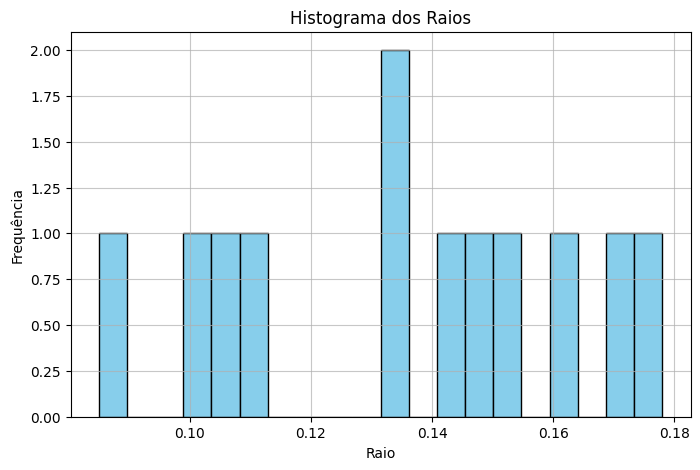

Propor√ß√£o (planetas menores que a Terra): 0.34%
Propor√ß√£o (planetas maiores que a Terra): 99.66%

Propor√ß√£o com raio m√©dio de todos os planetas: 0.12798


In [5]:
# Par√¢metros
coluna = "pl_radj"
x      = 0.09123     # valor alvo (float)
tol    = 0.1        # toler√¢ncia, ex.: ¬±0.1

mask_r = (df_filtrado[coluna] - x).abs() <= tol
df_r = df_filtrado[mask_r]

# M√©dia
media = df_r[coluna].mean()

# Vari√¢ncia amostral
variancia_amostral = df_r[coluna].var(ddof=1)

# Desvio padr√£o
desvio_amostral = df_r[coluna].std(ddof=1)

print(f"Cerca de {len(df_r[coluna])} planetas possuem o raio semelhante ao da Terra!")
# Mostra quantos, dos planetas encontrados, possuem raio semelhante ao da Terra
print(f"Propor√ß√£o dos planetas encontrados: {len(df_r)/len(df_filtrado) :.7f}")
print(f"M√©dia do raio dos planetas: {media:.7f}")
print(f"Vari√¢ncia (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padr√£o (amost.): {desvio_amostral:.7f}")

# --- plotando histograma ---
plt.figure(figsize=(8, 5))

df_r[coluna].plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma dos Raios")
plt.xlabel("Raio")
plt.ylabel("Frequ√™ncia")
plt.grid(alpha=0.7)
plt.show()

# df_fitrado: dados na tabela que possuem um valor de raio
menores = (df_filtrado[coluna] < x).mean() * 100
maiores = (df_filtrado[coluna] > x).mean() * 100
print(f"Propor√ß√£o (planetas menores que a Terra): {menores:.2f}%")
print(f"Propor√ß√£o (planetas maiores que a Terra): {maiores:.2f}%\n")
print(f"Propor√ß√£o com raio m√©dio de todos os planetas: {media/df_filtrado[coluna].mean():.5f}")

Calculando IC de 95% para a m√©dia dos raio:

$n = 380, \alpha = 0,05, \hat{p} \approxeq 0,13335$

$IC: 0,13335 \pm z_{0,025} \cdot \sqrt{\frac{0,13335 \cdot (1-0,13335)}{380}} $

In [6]:
# M√©dia dos raios semelhantes √† terra / M√©dia dos raios de todos os planetas
p_hat = media/df_filtrado[coluna].mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Margem de erro
se = math.sqrt(p_hat * (1 - p_hat) / len(df_filtrado))
me = z * se

ic_lower = p_hat - me
ic_upper = p_hat + me

print(f"IC 95% (Normal): [{ic_lower:.4f}, {ic_upper:.4f}]")

IC 95% (Normal): [0.0896, 0.1664]


Estamos 95% confiantes de que a propor√ß√£o populacional verdadeira est√° no intervalo $[0,0992;~0,1675]$.

**Planetas cujo a massa se assemelha ao da  Terra**

Como o massa de cada planeta tamb√©m est√° medido em **raios de j√∫piter**, faremos uma convers√£o da massa da Terra:

$M_{Terra} = 5,9722 \cdot 10^{24}~kg = \frac{5,9722 \cdot 10^{24}}{1,898 \cdot 10^{27}} \approx 0,003147$ massas de j√∫piter

Cerca de 10 planetas possuem massa semelhante a da Terra!
Propor√ß√£o dos planetas encontrados: 3.44%
M√©dia da massa dos planetas: 0.0087750
Vari√¢ncia (amost.): 0.0000102
Desvio-padr√£o (amost.): 0.0031977


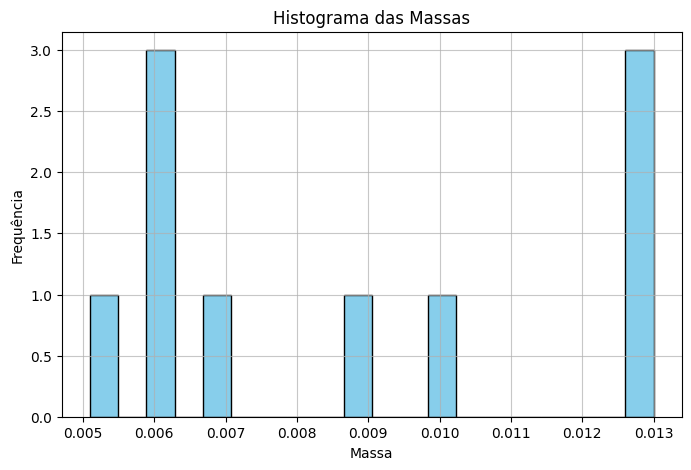

Propor√ß√£o (planetas menos massivo que a Terra): 0.00%
Propor√ß√£o (planetas mais massivo que a Terra): 100.00%
Propor√ß√£o com raio m√©dio de todos os planetas: 0.00589


In [7]:
# Par√¢metros
coluna = "pl_bmassj"
x      = 0.003147     # valor alvo (float)
tol    = 0.01       # toler√¢ncia, ex.: ¬±0.01

mask_m = (df_filtrado[coluna] - x).abs() <= tol
df_m = df_filtrado[mask_m]

# M√©dia
media = df_m[coluna].mean()

# Vari√¢ncia amostral
variancia_amostral = df_m[coluna].var(ddof=1)

# Desvio padr√£o
desvio_amostral = df_m[coluna].std(ddof=1)
 
print(f"Cerca de {len(df_m[coluna])} planetas possuem massa semelhante a da Terra!")
print(f"Propor√ß√£o dos planetas encontrados: {(len(df_m)/len(df_filtrado)) * 100 :.2f}%")
print(f"M√©dia da massa dos planetas: {media:.7f}")
print(f"Vari√¢ncia (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padr√£o (amost.): {desvio_amostral:.7f}")
 
serie = df_m[coluna]
 
# --- plotando histograma ---
plt.figure(figsize=(8, 5))
 
serie.plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma das Massas")
plt.xlabel("Massa")
plt.ylabel("Frequ√™ncia")
plt.grid(alpha=0.7)
plt.show()

menores = (df_m[coluna] < x).mean() * 100
print(f"Propor√ß√£o (planetas menos massivo que a Terra): {menores:.2f}%")
print(f"Propor√ß√£o (planetas mais massivo que a Terra): {100 - menores:.2f}%")
print(f"Propor√ß√£o com raio m√©dio de todos os planetas: {media/df_filtrado[coluna].mean():.5f}")

Calculando IC de 95% para a m√©dia das massa:

$n = 380, \alpha = 0,05, \hat{p} \approxeq 0,00605$

$IC: 0,00605 \pm z_{0,025} \cdot \sqrt{\frac{0,00605 \cdot (1-0,00605)}{380}} $

In [8]:
# M√©dia das massa semelhantes √† terra / M√©dia das massa de todos os planetas
p_hat = media/df_filtrado[coluna].mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Margem de erro
se = math.sqrt(p_hat * (1 - p_hat) / len(df_filtrado))
me = z * se

ic_lower = p_hat - me
ic_upper = p_hat + me

print(f"IC 95% (Normal): [{ic_lower:.4f}, {ic_upper:.4f}]")

IC 95% (Normal): [-0.0029, 0.0147]


Com isso, conclu√≠mos que a massa populacional dos planetas semelhantes a Terra est√° no intervalo $[-0,0017;~0,0139]$.

**Planetas cujo a excentridade orbital(achatamento da √≥rbita) se assemelha a da  Terra**

$e_{Terra} \approx 0,0167$ 

Cerca de 31 planetas possuem excentridade orbital semelhante a da Terra!
Propor√ß√£o dos planetas encontrados: 10.65%
M√©dia da excentridade dos planetas: 0.0155613
Vari√¢ncia (amost.): 0.0000300
Desvio-padr√£o (amost.): 0.0054778


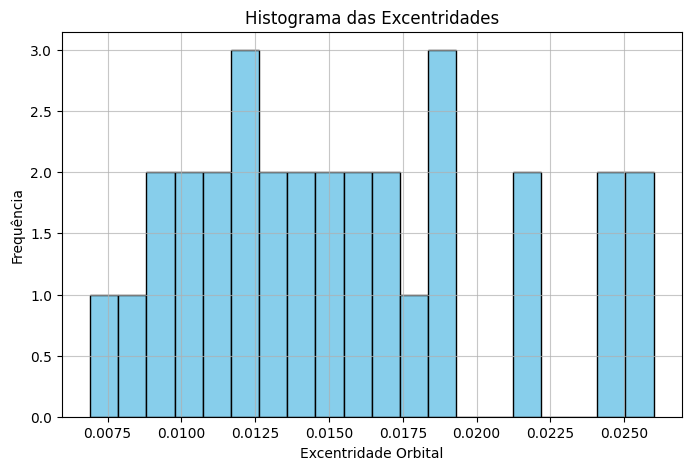

Propor√ß√£o (planetas com excentridade menor que a Terra): 66.67%
Propor√ß√£o (planetas com excentridade maior que a Terra): 33.33%
Propor√ß√£o com excentridade m√©dia de todos os planetas: 0.19751


In [9]:
# Par√¢metros
coluna = "pl_orbeccen"
x      = 0.0167     # valor alvo (float)
tol    = 0.01       # toler√¢ncia, ex.: ¬±0.01

mask_e = (df_filtrado[coluna] - x).abs() <= tol
df_e = df_filtrado[mask_e]

# M√©dia
media = df_e[coluna].mean()

# Vari√¢ncia amostral
variancia_amostral = df_e[coluna].var(ddof=1)

# Desvio padr√£o
desvio_amostral = df_e[coluna].std(ddof=1)
 
print(f"Cerca de {len(df_e[coluna])} planetas possuem excentridade orbital semelhante a da Terra!")
print(f"Propor√ß√£o dos planetas encontrados: {(len(df_e)/len(df_filtrado)) * 100 :.2f}%")
print(f"M√©dia da excentridade dos planetas: {media:.7f}")
print(f"Vari√¢ncia (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padr√£o (amost.): {desvio_amostral:.7f}")
 
serie = df_e[coluna]
 
# --- plotando histograma ---
plt.figure(figsize=(8, 5))
 
serie.plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma das Excentridades")
plt.xlabel("Excentridade Orbital")
plt.ylabel("Frequ√™ncia")
plt.grid(alpha=0.7)
plt.show()

menores = (df_r[coluna] < x).mean() * 100
print(f"Propor√ß√£o (planetas com excentridade menor que a Terra): {menores:.2f}%")
print(f"Propor√ß√£o (planetas com excentridade maior que a Terra): {100 - menores:.2f}%")
print(f"Propor√ß√£o com excentridade m√©dia de todos os planetas: {media/df_filtrado[coluna].mean():.5f}")

Calculando IC de 95% para a m√©dia das massa:

$n = 380, \alpha = 0,05, \hat{p} \approxeq 0,19751$

$IC: 0,19751 \pm z_{0,025} \cdot \sqrt{\frac{0,19751 \cdot (1-0,19751)}{380}} $

In [10]:
################# IC de Excentridade #################

# M√©dia das excentridades semelhantes √† terra / M√©dia das excentricidades orbitais de todos os planetas
p_hat = media/df_filtrado[coluna].mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Margem de erro
se = math.sqrt(p_hat * (1 - p_hat) / len(df_filtrado))
me = z * se

ic_lower = p_hat - me
ic_upper = p_hat + me

print(f"IC 95% (Normal): [{ic_lower:.4f}, {ic_upper:.4f}]")

IC 95% (Normal): [0.1518, 0.2433]


Com isso, conclu√≠mos que a excentridade populacional dos planetas semelhantes a Terra est√° no intervalo $[0,1518;~0,2433]$.

**Planetas cujo o per√≠odo orbital (tempo de revolu√ß√£o em torno da estrela) se assemelha ao da Terra**

$P_{Terra} \approx 365,25 \text{ dias (0,25 = +4 horas)}$

Nesta an√°lise, buscamos identificar exoplanetas que apresentem **per√≠odos orbitais pr√≥ximos ao da Terra**, isto √©, o tempo que levam para dar uma volta completa em torno de sua estrela hospedeira.

Para isso, consideramos planetas cujo per√≠odo orbital esteja dentro de uma faixa de toler√¢ncia de ¬±20 dias, ou seja:

$[345,25 \leqslant P_{exoplaneta} \leqslant 385,25]$

### üî¢ Par√¢metros utilizados:

- **Coluna analisada:** `pl_orbper`
- **Valor de refer√™ncia (Terra):** $365{,}25$ dias
- **Toler√¢ncia ($\pm$):** 20 dias
- **Intervalo considerado:** [345,25 ; 385,25] dias
- **Total de planetas ap√≥s filtro pr√©vio:** `len(df_filtrado)`

A seguir, ser√£o calculadas:
- A **quantidade de planetas** com per√≠odo semelhante ao da Terra;
- A **propor√ß√£o** em rela√ß√£o ao total da amostra;
- A **m√©dia**, **vari√¢ncia** e **desvio padr√£o** desses planetas;
- Um **histograma** ilustrando a distribui√ß√£o dos per√≠odos;
- E o **intervalo de confian√ßa (95%)** da raz√£o entre a m√©dia dos semelhantes e a m√©dia global.


In [13]:
# --------------------- FILTRO PARA PER√çODO ORBITAL ------------------------

# Criando um novo DataFrame apenas com os dados relevantes para a an√°lise do per√≠odo orbital

df_orbper = df_original[
    (df_original['pl_orbper'].notna()) &                          # per√≠odo orbital v√°lido
    (df_original['pl_hostname'].str.strip() != '') &             # nome da estrela n√£o vazio
    (df_original['st_teff'].notna())                             # temperatura da estrela v√°lida
]

print(f"Total de planetas com dados suficientes para an√°lise do per√≠odo orbital: {len(df_orbper)}")


Total de planetas com dados suficientes para an√°lise do per√≠odo orbital: 3190


Cerca de 21 planetas possuem per√≠odo orbital semelhante ao da Terra!
Propor√ß√£o dos planetas encontrados: 0.66%
M√©dia do per√≠odo orbital: 363.8458033 dias
Vari√¢ncia (amost.): 162.0449404
Desvio-padr√£o (amost.): 12.7296874


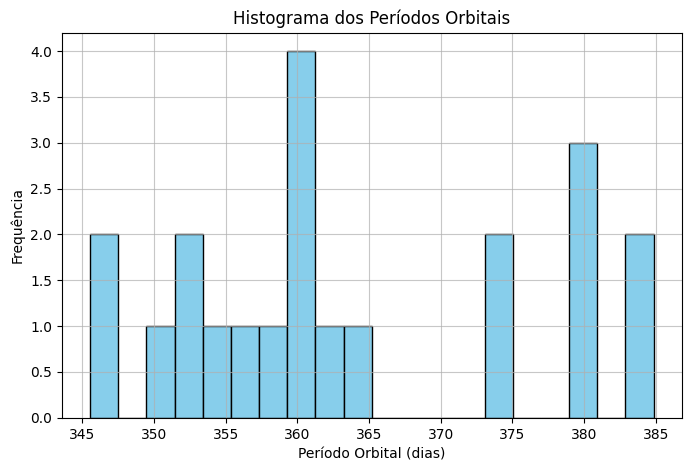

Propor√ß√£o (planetas com per√≠odo menor que a Terra): 90.85%
Propor√ß√£o (planetas com per√≠odo maior que a Terra): 9.15%
Propor√ß√£o com per√≠odo m√©dio em rela√ß√£o ao total: 0.14446


In [15]:
# ---------------------- PER√çODO ORBITAL -----------------------

# Par√¢metros
coluna = "pl_orbper"
x      = 365.25     # valor de refer√™ncia (dias)
tol    = 20         # toler√¢ncia: ¬±20 dias

# Filtro para planetas com per√≠odo semelhante ao da Terra
mask_p = (df_orbper[coluna] - x).abs() <= tol
df_p = df_orbper[mask_p]

# M√©dia
media = df_p[coluna].mean()

# Vari√¢ncia amostral
variancia_amostral = df_p[coluna].var(ddof=1)

# Desvio padr√£o amostral
desvio_amostral = df_p[coluna].std(ddof=1)

print(f"Cerca de {len(df_p[coluna])} planetas possuem per√≠odo orbital semelhante ao da Terra!")
print(f"Propor√ß√£o dos planetas encontrados: {(len(df_p)/len(df_orbper)) * 100 :.2f}%")
print(f"M√©dia do per√≠odo orbital: {media:.7f} dias")
print(f"Vari√¢ncia (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padr√£o (amost.): {desvio_amostral:.7f}")

# --- plotando histograma ---
plt.figure(figsize=(8, 5))
df_p[coluna].plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma dos Per√≠odos Orbitais")
plt.xlabel("Per√≠odo Orbital (dias)")
plt.ylabel("Frequ√™ncia")
plt.grid(alpha=0.7)
plt.show()

# Propor√ß√µes de planetas menores e maiores que o per√≠odo da Terra
menores = (df_orbper[coluna] < x).mean() * 100
maiores = (df_orbper[coluna] > x).mean() * 100
print(f"Propor√ß√£o (planetas com per√≠odo menor que a Terra): {menores:.2f}%")
print(f"Propor√ß√£o (planetas com per√≠odo maior que a Terra): {maiores:.2f}%")
print(f"Propor√ß√£o com per√≠odo m√©dio em rela√ß√£o ao total: {media/df_orbper[coluna].mean():.5f}")


In [17]:
# Intervalo de confian√ßa para m√©dia (forma correta para compara√ß√£o entre m√©dias)
media_total = df_orbper[coluna].mean()
n = len(df_p)

# Erro padr√£o da m√©dia
se = df_p[coluna].std(ddof=1) / math.sqrt(n)

# Par√¢metros do IC
alpha = 0.05
z = norm.ppf(1 - alpha / 2)

# Margem de erro e IC
me = z * se
ic_lower = media - me
ic_upper = media + me

print(f"IC 95% para a m√©dia do per√≠odo orbital (em dias): [{ic_lower:.2f}, {ic_upper:.2f}]")


IC 95% para a m√©dia do per√≠odo orbital (em dias): [358.40, 369.29]


## Conclus√£o
- O Telesc√≥pio Kepler revolucionou nossa compreens√£o dos exoplanetas e da diversidade dos sistemas planet√°rios.
- O conjunto de dados dispon√≠vel oferece uma rica fonte de informa√ß√µes para pesquisas futuras e an√°lises estat√≠sticas.
- Atrav√©s do uso de ferramentas como Jupyter Notebooks, podemos explorar e visualizar esses dados, contribuindo para o avan√ßo da astronomia e da astrobiologia.